# Project Overview

<h2>Problem Introduction</h2>

This capstone project aims to predict accident severity (i.e. the impact of a road accident) based on several features. 

The machine learning model will be able to help people make safer decisions and will encourage them to avoid travelling in high risk areas and in dangerous conditions, thus reducing the number of accidents. 

It will also help government authorities and relief authorities to help them plan ahead and improve their responses to accidents by putting in safety measures in response to the predicted accident severity. 

We will analyse and present findings based on publicly availvable collision data in the city of Seattle, providided by the Seattle Deport of Transportation (SDOT).

<h2>Data</h2>

The dataset contains almost 195,000 records of accidents in Seattle over the course of a 15-year period and 37 unique features.

The key features that will be used in the project to train the machine learning model and predict accident severity are:

- Location 
- Weather 
- Junction type 
- Light condition
- Road condition
- Accident information 

The Metadata Form provided by SDOT tells us that accident severity is measured using the 'SEVERITYCODE' which has 5 classes, namely: 3(fatality), 2b(serious injury), 2(injury), 1(prop damage), and 0(unkown). However, the actual dataset only contains the values 1(prop damage) and 2(injury).

A copy of the Metadata Form can be found using the following link:
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

A lot of the data contains incomplete records with missing values, so data cleaning will need to be performed to make it usable by the machine learning algorithm.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

c:\users\44759\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [4]:
toDrop = ["X","Y","OBJECTID","INCKEY","COLDETKEY","REPORTNO","STATUS","INTKEY","LOCATION","EXCEPTRSNCODE","EXCEPTRSNDESC","SEVERITYCODE.1","SEVERITYDESC","INCDATE","SDOT_COLCODE","SDOT_COLDESC","SDOTCOLNUM","ST_COLDESC","SEGLANEKEY","CROSSWALKKEY"]
reduced_df = df.drop(toDrop,axis=1)
print("table shape:", reduced_df.shape)
reduced_df.head()

table shape: (194673, 18)


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


| Dropped-features | Reason | 
|-----|---|
| X | Not in Metadata File & too many unique entries |
| Y    | Not in Metadata File & too many unique entries  |
|  OBJECTID   | ID unique for every entry  |
|  INCKEY   | ID unique for every entry  |
|  COLDETKEY   | ID unique for every entry  |
|  REPORTNO   | ID unique for every entry  |
|  STATUS   | Not in Metadata File  |
|  INTKEY   | Almost 2/3 fields are empty |
|  LOCATION   | Too many unique values  |
|  EXCEPTRSNCODE   | Metadata File does not provide a description  |
|  EXCEPTRSNDESC   | Metadata File does not provide a description  |
|  SEVERITYCODE.1   | Duplicate  |
|  SEVERITYDESC   | Duplicate of SEVERITYCODE  |
|  INCDATE   | Date and time already in INCDTTM  |
|  SDOT_COLCODE   | Does not predict severity before it happens  |
|  SDOT_COLDESC   | Duplicate of SDOT_COLDESC  |
|  SDOTCOLNUM   | Too many unique values  |
|  ST_COLDESC   | Duplicate of ST_COLCODE  |
|  SEGLANEKEY   | Too many unique values  |
|  CROSSWALKKEY   | Too many empty values  |

<h4>Dealing with missing values</h4>

The table below shows the features with issues such as missing values that we are still using and how what action we are taking to correct these.

| Features that need correcting | Required action | 
|-----|---|
| PEDROWNOTGRNT    | Replace empty values with 'N' <strong>THEN</strong> replace 'Y/N' -> '1/0' respectively  |
| SPEEDING    | Replace empty values with 'N' <strong>THEN</strong> replace 'Y/N' -> '1/0' respectively  |
| INATTENTIONIND    | Replace empty values with 'N' <strong>THEN</strong> replace 'Y/N' -> '1/0' respectively  |
| UNDERINFL    | Replace 'Y/N' -> '1/0' respectively  |
| INCDTTM    | Convert to datetime  |

Possible issue with this approach: Some of the missing values may not be in the dataset due to uncertainty. The method used in this project assumes that the missing values correspond to 'N'.


In [5]:
reduced_df.fillna({'INATTENTIONIND':'N','PEDROWNOTGRNT':'N','SPEEDING':'N'},inplace=True)
reduced_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,N,10,N
1,1,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),N,0,Raining,Wet,Dark - Street Lights On,N,N,11,N
2,1,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,N,N,32,N
3,1,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,23,N
4,2,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),N,0,Raining,Wet,Daylight,N,N,10,N


In [6]:
reduced_df['INATTENTIONIND'].replace(to_replace=['Y','N'], value=[1,0], inplace=True)
reduced_df['UNDERINFL'].replace(to_replace=['Y','N'], value=[1,0], inplace=True)
reduced_df['PEDROWNOTGRNT'].replace(to_replace=['Y','N'], value=[1,0], inplace=True)
reduced_df['SPEEDING'].replace(to_replace=['Y','N'], value=[1,0], inplace=True)
reduced_df['HITPARKEDCAR'].replace(to_replace=['Y','N'], value=[1,0], inplace=True)
# reduced_df.INATTENTIONIND.replace('N',0,inplace=True)
# #['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']
reduced_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,10,0
1,1,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,1,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,32,0
3,1,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,23,0
4,2,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,10,0


In [7]:
# Drop all the rows with missing values in any columns
reduced_df=reduced_df.dropna()
reduced_df.shape

(182895, 18)

In [8]:
import datetime

In [9]:
reduced_df['DATE'] = pd.to_datetime(reduced_df['INCDTTM']).dt.date
reduced_df['TIME'] = pd.to_datetime(reduced_df['INCDTTM']).dt.time

In [10]:
reduced_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,DATE,TIME
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,10,0,2013-03-27,14:54:00
1,1,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0,2006-12-20,18:55:00
2,1,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,32,0,2004-11-18,10:20:00
3,1,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,23,0,2013-03-29,09:26:00
4,2,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,10,0,2004-01-28,08:04:00


Day of week ranges from 0(Monday) - 6(Sunday)
<br>
Month ranges from 1(January) - 12(December)

In [11]:
reduced_df['DAY_OF_WEEK'] = pd.to_datetime(reduced_df['DATE']).dt.dayofweek
reduced_df['MONTH'] = pd.to_datetime(reduced_df['DATE']).dt.month
reduced_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,DATE,TIME,DAY_OF_WEEK,MONTH
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),0,...,Wet,Daylight,0,0,10,0,2013-03-27,14:54:00,2,3
1,1,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,...,Wet,Dark - Street Lights On,0,0,11,0,2006-12-20,18:55:00,2,12
2,1,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,...,Dry,Daylight,0,0,32,0,2004-11-18,10:20:00,3,11
3,1,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),0,...,Dry,Daylight,0,0,23,0,2013-03-29,09:26:00,4,3
4,2,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,...,Wet,Daylight,0,0,10,0,2004-01-28,08:04:00,2,1


The following columns are not needed as we have extracted the relevant information (day of the week and month) from them.

In [12]:
reduced_df.drop(['INCDTTM','DATE','TIME'], axis=1, inplace=True)
reduced_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,DAY_OF_WEEK,MONTH
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,10,0,2,3
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0,2,12
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,32,0,3,11
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,23,0,4,3
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,10,0,2,1


In [13]:
reduced_df.shape

(182895, 19)

## Transforming categorical data: Method 1 - OneHotEncoder

In [14]:
onehot_df = pd.get_dummies(reduced_df, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND'], drop_first=True)
onehot_df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,...,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,2,0,0,2,0,0,0,0,10,...,0,1,0,0,0,0,1,0,0,0
1,1,2,0,0,2,0,0,0,0,11,...,0,1,0,1,0,0,0,0,0,0
2,1,4,0,0,3,0,0,0,0,32,...,0,0,0,0,0,0,1,0,0,0
3,1,3,0,0,3,0,0,0,0,23,...,0,0,0,0,0,0,1,0,0,0
4,2,2,0,0,2,0,0,0,0,10,...,0,1,0,0,0,0,1,0,0,0


In [39]:
print('Before using OneHotEncoder: ' , reduced_df.shape)
print('After using OneHotEncoder: ' , onehot_df.shape)

Before using OneHotEncoder:  (182895, 19)
After using OneHotEncoder:  (182895, 56)


The number of columns have increased drastically using this technique.

In [16]:
onehot_df=onehot_df.apply(pd.to_numeric)
onehot_df.dtypes

SEVERITYCODE                                            int64
PERSONCOUNT                                             int64
PEDCOUNT                                                int64
PEDCYLCOUNT                                             int64
VEHCOUNT                                                int64
INATTENTIONIND                                          int64
UNDERINFL                                               int64
PEDROWNOTGRNT                                           int64
SPEEDING                                                int64
ST_COLCODE                                              int64
HITPARKEDCAR                                            int64
DAY_OF_WEEK                                             int64
MONTH                                                   int64
ADDRTYPE_Block                                          uint8
ADDRTYPE_Intersection                                   uint8
COLLISIONTYPE_Cycles                                    uint8
COLLISIO

Now that all the categorical variables have been turned into numerical values, it can be used to train machine learning models. 

## Transforming categorical data: Method 2 - LabelEncoder

The benefit of using the one hot encoding technique is that it helps prevent the model from assuming inaccurate relationships between data e.g. Raining < Wet < ... < Clear which would be a problem with label encoding. 

However, one hot encoding results in a much larger dataset with several additional columns which can lead to high memory consumption.

In this project, we will use label encoding to transform categorical data.

In [17]:
from sklearn import preprocessing

le_df = reduced_df

le = preprocessing.LabelEncoder()


le_df['ADDRTYPE'] = le.fit_transform(le_df['ADDRTYPE'])
le_df['COLLISIONTYPE'] = le.fit_transform(le_df['COLLISIONTYPE'])
le_df['JUNCTIONTYPE'] = le.fit_transform(le_df['JUNCTIONTYPE'])
le_df['WEATHER'] = le.fit_transform(le_df['WEATHER'])
le_df['ROADCOND'] = le.fit_transform(le_df['ROADCOND'])
le_df['LIGHTCOND'] = le.fit_transform(le_df['LIGHTCOND'])
le_df

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,DAY_OF_WEEK,MONTH
0,2,2,0,2,0,0,2,1,0,0,4,8,5,0,0,10,0,2,3
1,1,1,9,2,0,0,2,4,0,0,6,8,2,0,0,11,0,2,12
2,1,1,5,4,0,0,3,4,0,0,4,0,5,0,0,32,0,3,11
3,1,1,4,3,0,0,3,4,0,0,1,0,5,0,0,23,0,4,3
4,2,2,0,2,0,0,2,1,0,0,6,8,5,0,0,10,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,1,2,3,0,0,2,4,0,0,1,0,5,0,0,24,0,0,11
194669,1,1,7,2,0,0,2,4,1,0,6,8,5,0,0,13,0,1,12
194670,2,2,3,3,0,0,2,1,0,0,1,0,5,0,0,28,0,5,1
194671,2,2,1,2,0,1,1,1,0,0,1,0,6,0,0,5,0,1,1


In [18]:
le_df=le_df.apply(pd.to_numeric)
le_df.dtypes

SEVERITYCODE      int64
ADDRTYPE          int32
COLLISIONTYPE     int32
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE      int32
INATTENTIONIND    int64
UNDERINFL         int64
WEATHER           int32
ROADCOND          int32
LIGHTCOND         int32
PEDROWNOTGRNT     int64
SPEEDING          int64
ST_COLCODE        int64
HITPARKEDCAR      int64
DAY_OF_WEEK       int64
MONTH             int64
dtype: object

## KNN

In [19]:
import numpy as np
import matplotlib as plt 
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [20]:
KNN_df = le_df
X_columns = np.array(KNN_df[KNN_df.columns.difference(['SEVERITYCODE'])])
y = KNN_df['SEVERITYCODE']

In [21]:
# Standardise X values
X = preprocessing.StandardScaler().fit_transform(X_columns)
X

array([[ 1.37070179, -1.59060052, -0.49277722, ..., -0.22745818,
         0.04974136,  0.37890804],
       [-0.72134794,  1.60132589, -0.49277722, ..., -0.22745818,
         0.04974136,  1.11150123],
       [-0.72134794,  0.18269193,  0.02745442, ..., -0.22745818,
         1.82519929,  0.37890804],
       ...,
       [ 1.37070179, -0.52662505,  1.0679177 , ..., -0.22745818,
         0.04974136, -0.71998175],
       [ 1.37070179, -1.23594203, -1.01300886, ..., -0.22745818,
        -1.72571657, -0.71998175],
       [-0.72134794,  0.89200891,  0.54768606, ..., -0.22745818,
         0.04974136, -0.71998175]])

In [22]:
X.shape

(182895, 18)

In [23]:
y.shape

(182895,)

In [24]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146316, 18) (146316,)
Test set: (36579, 18) (36579,)


In [25]:
y_train

152245    2
153198    2
65387     1
163358    2
76016     1
         ..
74469     2
112613    1
50620     1
5439      1
133445    1
Name: SEVERITYCODE, Length: 146316, dtype: int64

In [26]:
y_test

180043    1
99502     1
166036    2
142118    1
119378    2
         ..
88711     1
63571     1
166214    1
74196     1
80836     1
Name: SEVERITYCODE, Length: 36579, dtype: int64

Initially try with k=5:

In [27]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model on the training data.
knn.fit(X_train, y_train)
# Make point predictions on the test set using the fit model.
yhat = knn.predict(X_test)
yhat

array([2, 1, 2, ..., 1, 1, 1], dtype=int64)

In [28]:
acc = metrics.accuracy_score(y_test, yhat)
acc

0.7153011290631236

To see which value of k gives the best accuracy, we will need to repeat the process with a range of values for k.

In [29]:
Ks = 12
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
print(max(mean_acc))

0.736160091855983


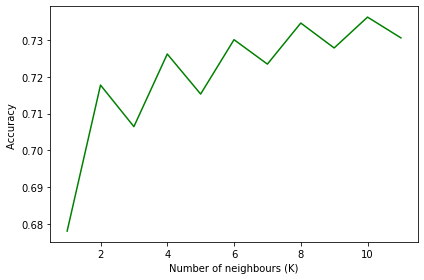

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbours (K)')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.736160091855983 with k= 10


## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
# Use probability for logloss
yhat_LR_proba = LR.predict_proba(X_test)
acc_LR = metrics.accuracy_score(y_test, yhat_LR)
acc_LR

0.743978785642035

## SVM

In [33]:
from sklearn.svm import SVC

SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)
yhat_SVM = SVM.predict(X_test)
acc_SVM = metrics.accuracy_score(y_test, yhat_SVM)
acc_SVM

0.7429946143962383

## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

depth = 12
mean_acc_DT = np.zeros((depth-1))
for n in range(1,depth):
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train, y_train)
    yhat_DT = DT.predict(X_test)
    mean_acc_DT[n-1] = metrics.accuracy_score(y_test, yhat_DT)

print( "The best accuracy was with", mean_acc_DT.max(), "with k=", mean_acc_DT.argmax()+1)

The best accuracy was with 0.7527816506738839 with k= 9


# Analysing Model Performance

In [46]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

scores = {'Algorithm': ['KNN','LogisticRegression','SVM', 'Decision Tree'], 
     'Jaccard': [
         jaccard_score(y_test,yhat), 
         jaccard_score(y_test,yhat_LR), 
         jaccard_score(y_test,yhat_SVM),
         jaccard_score(y_test,yhat_DT)
     ],
     'F1-score': [
         f1_score(y_test,yhat), 
         f1_score(y_test,yhat_LR), 
         f1_score(y_test,yhat_SVM), 
         f1_score(y_test,yhat_DT)
     ],
     'LogLoss': [
         np.nan, 
         log_loss(y_test, yhat_LR_proba), 
         np.nan, 
         np.nan
     ]}

metricsScores = pd.DataFrame(data=scores)
metricsScores

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.692564,0.818361,NaN
1,LogisticRegression,0.722617,0.838976,0.529627
2,SVM,0.727199,0.842056,NaN
3,Decision Tree,0.721759,0.838397,NaN


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [36]:
# The following function was copied from practice lab
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.77      0.88      0.82     25327
           2       0.59      0.40      0.48     11252

    accuracy                           0.73     36579
   macro avg       0.68      0.64      0.65     36579
weighted avg       0.71      0.73      0.71     36579

Confusion matrix, without normalization
[[22205  3122]
 [ 6735  4517]]


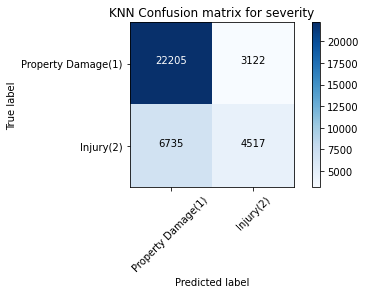

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='KNN Confusion matrix for severity')

              precision    recall  f1-score   support

           1       0.74      0.96      0.84     25327
           2       0.75      0.25      0.38     11252

    accuracy                           0.74     36579
   macro avg       0.75      0.61      0.61     36579
weighted avg       0.75      0.74      0.70     36579

Confusion matrix, without normalization
[[24397   930]
 [ 8435  2817]]


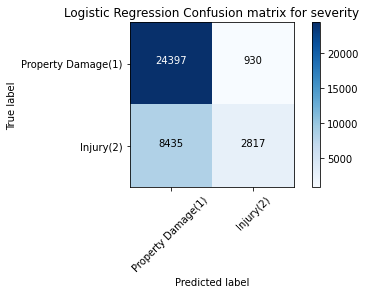

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='Logistic Regression Confusion matrix for severity')

              precision    recall  f1-score   support

           1       0.73      0.99      0.84     25327
           2       0.89      0.19      0.31     11252

    accuracy                           0.74     36579
   macro avg       0.81      0.59      0.58     36579
weighted avg       0.78      0.74      0.68     36579

Confusion matrix, without normalization
[[25060   267]
 [ 9134  2118]]


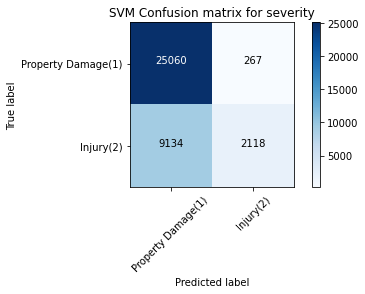

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='SVM Confusion matrix for severity')

              precision    recall  f1-score   support

           1       0.76      0.93      0.84     25327
           2       0.69      0.35      0.47     11252

    accuracy                           0.75     36579
   macro avg       0.73      0.64      0.65     36579
weighted avg       0.74      0.75      0.72     36579

Confusion matrix, without normalization
[[23551  1776]
 [ 7303  3949]]


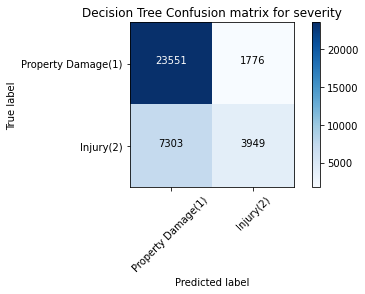

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_DT, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_DT))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='Decision Tree Confusion matrix for severity')